In [39]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Cleaning and Preparation

In [44]:
df = pd.read_csv('../data/interim/processed_engagements_with_sentiment.csv')

df.head()

,timestamp,media_id,media_caption,comment_text,media_caption_pos,comment_text_pos,media_caption_ner,comment_text_ner,comment_sentiment,comment_polarity,media_caption_sentiment,media_caption_polarity,media_caption_length
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,"[('Soft', 'ADJ'), ('skin', 'NOUN'), (',', 'PUN...","[('I', 'PRON'), ('bet', 'VERB'), ('this', 'PRO...",[],[],very positive,0.70,neutral,0.112500,62
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,"[('Why', 'SCONJ'), ('use', 'VERB'), ('one', 'N...","[('i', 'PRON'), ('know', 'VERB'), ('this', 'PR...","[('one', 'CARDINAL'), ('#', 'CARDINAL')]",[],very positive,0.70,neutral,0.000000,93
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,"[('Morning', 'PROPN'), ('routine', 'NOUN'), ('...","[('Love', 'VERB'), ('it', 'PRON')]","[('Morning', 'TIME'), ('Tree Hut', 'ORG')]",[],positive,0.50,positive,0.500000,67
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...,"[('Why', 'SCONJ'), ('use', 'VERB'), ('one', 'N...","[('Please', 'INTJ'), ('carry', 'VERB'), ('thes...","[('one', 'CARDINAL')]","[('Canada', 'GPE')]",positive,0.25,neutral,0.000000,53
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️,"[('Vanilla', 'PROPN'), ('Serum', 'PROPN'), ('-...","[('I', 'PRON'), ('love', 'VERB'), ('it', 'PRON...","[('Vanilla Serum-Infused Hand Wash', 'PERSON')]",[],positive,0.50,neutral,0.141667,62


In [45]:
df = df[df['comment_sentiment'].isin(['very positive', 'positive', 'negative', 'very negative'])]


In [46]:
df.count()

timestamp                  2253
media_id                   2253
media_caption              2253
comment_text               2253
media_caption_pos          2253
comment_text_pos           2253
media_caption_ner          2253
comment_text_ner           2253
comment_sentiment          2253
comment_polarity           2253
media_caption_sentiment    2253
media_caption_polarity     2253
media_caption_length       2253
dtype: int64

In [49]:
df['positive'] = df['comment_sentiment'].apply(lambda x: 1 if x in ['positive', 'very positive'] else 0)


In [50]:
df['positive'].sum()

np.int64(2007)

In [51]:
df['has_gpe'] = df['media_caption_ner'].apply(lambda ner: 1 if "'GPE'" in str(ner) else 0)
gpe_percentage = df['has_gpe'].mean() * 100
print(f"Percentage of entries with has_gpe = 1: {gpe_percentage:.2f}%")


Percentage of entries with has_gpe = 1: 17.71%


In [52]:
df['has_norp'] = df['media_caption_ner'].apply(lambda ner: 1 if "'NORP'" in str(ner) else 0)
norp_percentage = df['has_norp'].mean() * 100
print(f"Percentage of entries with has_norp = 1: {norp_percentage:.2f}%")


Percentage of entries with has_norp = 1: 6.35%


In [55]:
df['has_person'] = df['media_caption_ner'].apply(lambda ner: 1 if "'PERSON'" in str(ner) else 0)
person_percentage = df['has_person'].mean() * 100
print(f"Percentage of entries with has_person = 1: {person_percentage:.2f}%")


Percentage of entries with has_person = 1: 40.97%


In [56]:

df['has_org'] = df['media_caption_ner'].apply(lambda ner: 1 if "'ORG'" in str(ner) else 0)
org_percentage = df['has_org'].mean() * 100
print(f"Percentage of entries with has_org = 1: {org_percentage:.2f}%")


Percentage of entries with has_org = 1: 40.52%


# Data split for modeling

In [57]:
# Keep only the specified columns for modeling/testing
df_for_modeling = df[['media_caption_polarity', 'positive', 'has_gpe', 'has_norp', 'has_person', 'has_org']]

In [59]:
df_for_modeling.head()

,media_caption_polarity,positive,has_gpe,has_norp,has_person,has_org
0,0.112500,1,0,0,0,0
1,0.000000,1,0,0,0,0
2,0.500000,1,0,0,0,1
3,0.000000,1,0,0,0,0
4,0.141667,1,0,0,1,0


In [60]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_for_modeling, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [62]:
df_for_modeling.dtypes



media_caption_polarity    float64
positive                    int64
has_gpe                     int64
has_norp                    int64
has_person                  int64
has_org                     int64
dtype: object

In [63]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.positive).astype('int').values
y_val = (df_val.positive).astype('int').values
y_test = (df_test.positive).astype('int').values

del df_train['positive']
del df_val['positive']
del df_test['positive']

# Decision Trees

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [76]:
train_dict = df_train.to_dict(orient='records')

In [77]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
val_dict = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dict)

In [79]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [80]:
roc_auc_score(y_val, y_pred)

0.5635784313725489

In [81]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.7553055326176714

In [82]:
# Retrain the tree with restriction on depth

dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

val_dict = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = dt.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.5795098039215686

Does only slightly better with optimal max depth

In [83]:
from sklearn.tree import export_text

In [84]:
print(export_text(dt, feature_names = list(dv.get_feature_names_out())))

|--- media_caption_polarity <= 0.03
|   |--- class: 1
|--- media_caption_polarity >  0.03
|   |--- class: 1



# Decision Tree Parameter tuning

Tune by looking at max_depth and min_leaf_samples

In [85]:
depths = [1, 2, 3, 4, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.580
   2 -> 0.577
   3 -> 0.577
   4 -> 0.569
None -> 0.565


In [86]:
scores = []

for depth in [1, 2, 3]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [87]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [88]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth            1      2      3
min_samples_leaf                    
1                 0.58  0.577  0.577
5                 0.58  0.577  0.577
10                0.58  0.577  0.577
15                0.58  0.577  0.577
20                0.58  0.577  0.577
100               0.58  0.577  0.584
200               0.58  0.589  0.593
500               0.58  0.580  0.580

#### Best fit for single decsion tree is max depth of 3 and min_sample_leaf size of 200

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

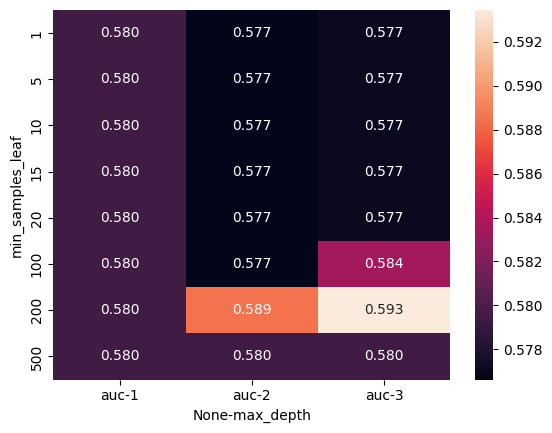

In [90]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [91]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=200)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,200
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [92]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- media_caption_polarity <= 0.03
|   |--- class: 1
|--- media_caption_polarity >  0.03
|   |--- has_gpe <= 0.50
|   |   |--- media_caption_polarity <= 0.40
|   |   |   |--- class: 1
|   |   |--- media_caption_polarity >  0.40
|   |   |   |--- class: 1
|   |--- has_gpe >  0.50
|   |   |--- class: 1

